## Flavors of cacao - Exploring relationships between percenatge of cacao and the rating of the chocolates.

### This script contains the following
#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships : Correlations, Scatterplots, Pair Plots, Categorical Plots
#### 4.Exporting the data

### 1. Importing Visualization Libraries and Data

In [55]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib


#### check matplotlib version

In [56]:
matplotlib.__version__

'3.5.2'

In [57]:
path = r'C:\Users\tee3a\3D Objects\Project 6'

In [58]:
df_airline = pd.read_csv(os.path.join(path, '02 Data','Prepared Data for storing any manipulated data sets', 'flavors_of_cacao_checked.csv'), index_col = False)

In [59]:
df_airline.tail(1)

,Unnamed: 0,Company Maker,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
1792,1794,Zotter,"Brazil, Mitzi Blue",486,2010,65.0,Austria,3.0,xao,Brazil


#### 2. Data Cleaning: dropping unwanted column 'Unnamed'

In [60]:
df_airline1 = df_airline.drop(columns = ['Unnamed: 0'])

In [61]:
df_airline1.tail(1)

,Company Maker,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
1792,Zotter,"Brazil, Mitzi Blue",486,2010,65.0,Austria,3.0,xao,Brazil


##### Create a subset including the 'REF', 'Review Date', 'Rating' , 'Cocoa Percent'

In [62]:
sub = df_airline1[['REF', 'Review Date', 'Rating' , 'Cocoa Percent']]
sub

,REF,Review Date,Rating,Cocoa Percent
0,1876,2016,3.75,63.0
1,1676,2015,2.75,70.0
2,1676,2015,3.00,70.0
3,1680,2015,3.50,70.0
4,1704,2015,3.50,70.0
...,...,...,...,...
1788,647,2011,3.75,70.0
1789,749,2011,3.00,65.0
1790,749,2011,3.50,65.0
1791,781,2011,3.25,62.0


### 3. Exploring Relationships

### Correlations

#### Create a correlation matrix using pandas

In [63]:
sub.corr()

,REF,Review Date,Rating,Cocoa Percent
REF,1.000000,0.985102,0.100689,0.037504
Review Date,0.985102,1.000000,0.099177,0.037938
Rating,0.100689,0.099177,1.000000,-0.164489
Cocoa Percent,0.037504,0.037938,-0.164489,1.000000


##### There are weak and no correlation between the variables.

### Create a correlation heatmap using matplotlib

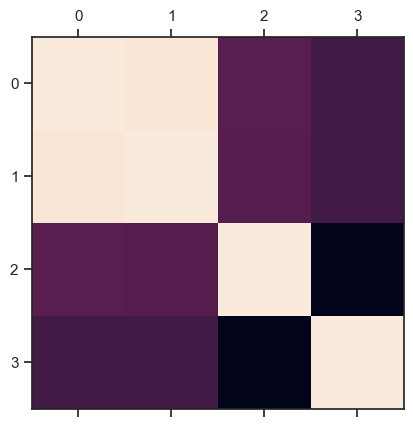

In [64]:
plt.matshow(sub.corr())
plt.show()

#### Save figure

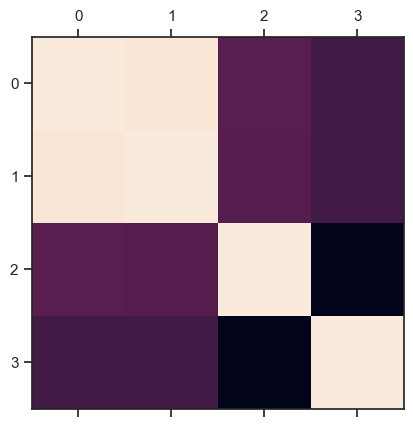

In [65]:
plt.matshow(sub.corr())
plt.savefig("out.png")


In [66]:
###### current dir
cwd = os.getcwd()
cwd

'C:\\Users\\tee3a\\3D Objects\\Project 6\\03 Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

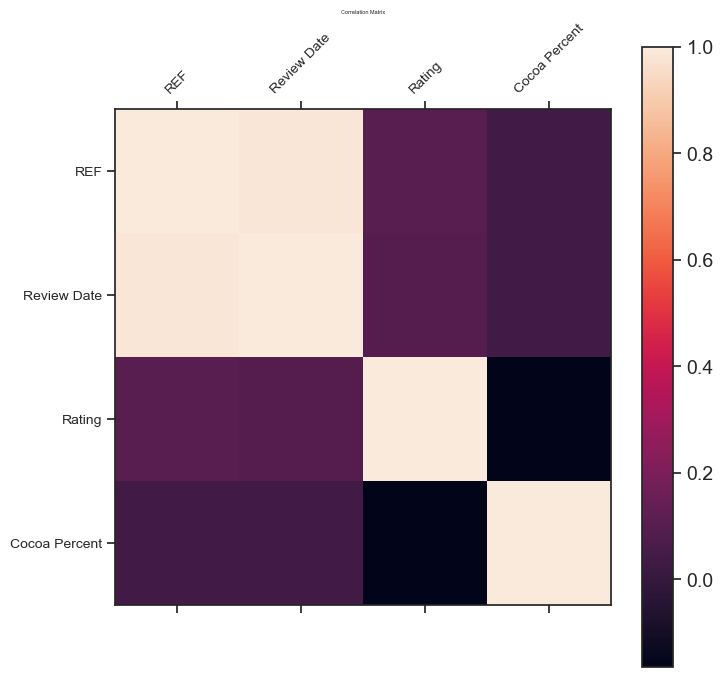

In [67]:
# Add labels, a legend, and change the size of the heatmap
f = plt.figure(figsize=(8, 8)) # figure size
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=10, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=4) # add title

##### There are weak and no correlations between the variables. There is a strong negative correlation between 'Cacao percent and 'Rating. There are also very weak correlations between the other variables.

#### Create a correlation heatmap using seaborn

In [68]:
df_airline1.columns

Index(['Company Maker', 'Specific Bean Origin or Bar Name', 'REF',
       'Review Date', 'Cocoa Percent', 'Company Location', 'Rating',
       'Bean Type', 'Broad Bean Origin'],
      dtype='object')

##### Create a subset including the 'REF', 'Review Date', 'Rating' , 'Cocoa Percent'

In [69]:
sub2 = sub[['Rating' , 'Cocoa Percent']]
sub2

,Rating,Cocoa Percent
0,3.75,63.0
1,2.75,70.0
2,3.00,70.0
3,3.50,70.0
4,3.50,70.0
...,...,...
1788,3.75,70.0
1789,3.00,65.0
1790,3.50,65.0
1791,3.25,62.0


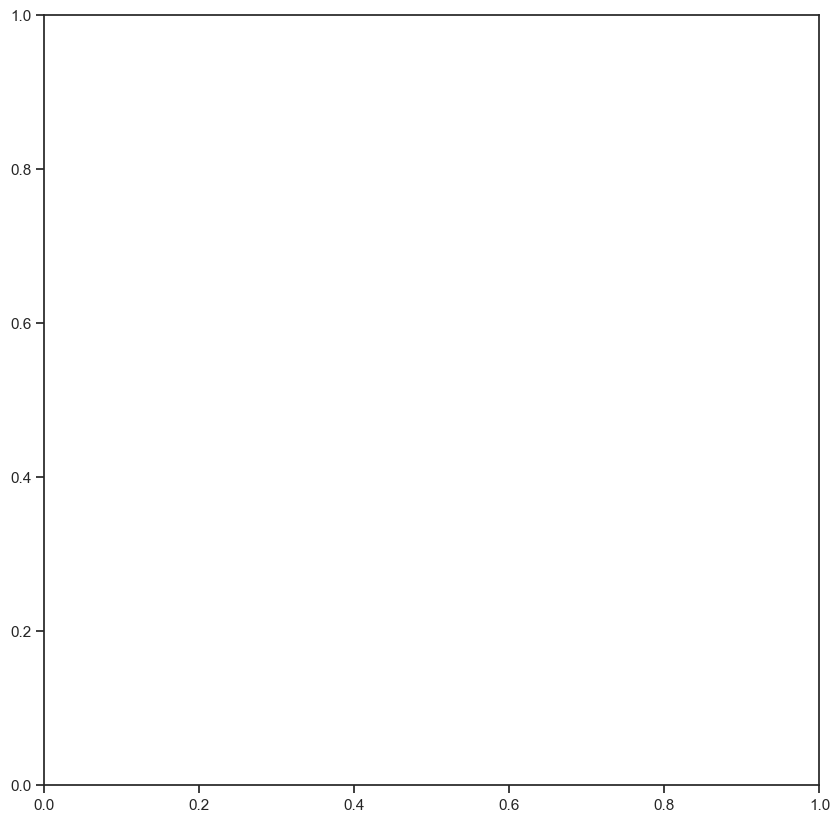

In [70]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))
plt.show()

In [71]:
fig2=sns.heatmap(sub.corr(), cmap="YlGnBu", annot = True, ax = ax)

In [72]:
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)
corr

<AxesSubplot:>

### Scatterplots
##### Create a scatterplot for the "Rating" and "Cocoa Percent" columns in seaborn

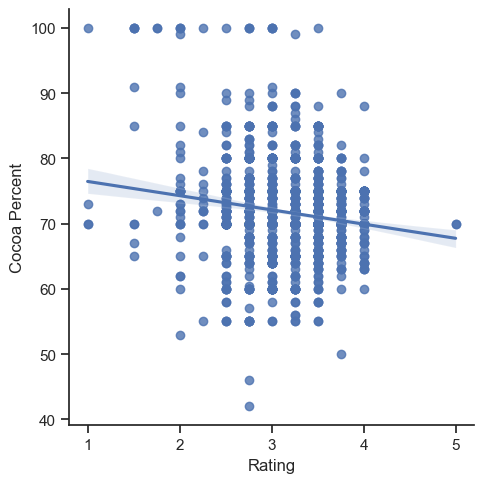

In [73]:
sns.lmplot(x = 'Rating', y = 'Cocoa Percent', data = df_airline1)

##### There is a strong negative correlation between 'Cocoa percent and 'Rating. The points are too far away from the line.

### Pair Plots
#### Create a pair plot

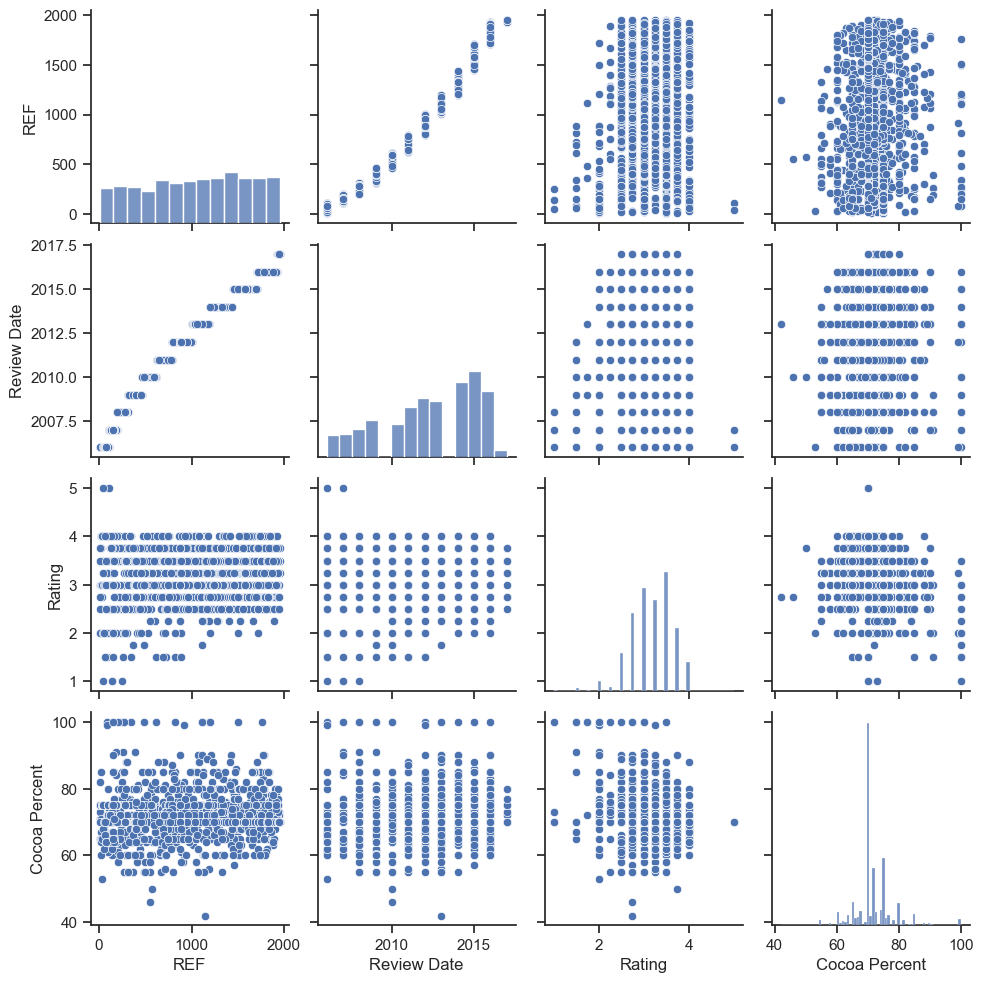

In [74]:
g = sns.pairplot(sub)

####### There is no correlation between all the vaiables: 'Cocoa percent, 'Rating, 'REF' and 'Review Date'.

### Categorical Plots
##### Creating a categorical variable that splits the \"Rating\" column into categories"

<AxesSubplot:xlabel='Rating', ylabel='Count'>

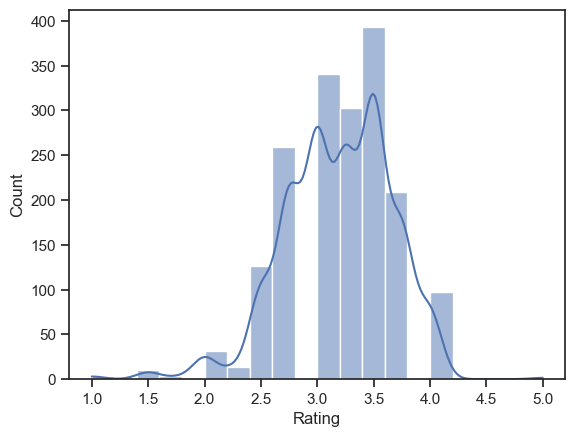

In [75]:
sns.histplot(df_airline1['Rating'], bins = 20, kde = True)

##### The chocolates with medium rating are more than that of low and high ratings put together.

### Category 'Rating'

In [76]:
df_airline1.loc[df_airline1['Rating'] < 3, 'Rating category'] = 'Low rating'
df_airline1.loc[(df_airline1['Rating'] >= 3) & (df_airline1['Rating'] < 4), 'Rating category'] = 'Middle rating'
df_airline1.loc[df_airline1['Rating'] >= 4, 'Rating category'] = 'High rating' 

In [77]:
df_airline1['Rating category'].value_counts(dropna = True)

Middle rating    1246
Low rating        448
High rating        99
Name: Rating category, dtype: int64

In [78]:
df_airline1.columns

Index(['Company Maker', 'Specific Bean Origin or Bar Name', 'REF',
       'Review Date', 'Cocoa Percent', 'Company Location', 'Rating',
       'Bean Type', 'Broad Bean Origin', 'Rating category'],
      dtype='object')

#### Create a categorical plot in seaborn using the price categories created above

In [79]:
sns.set(style="ticks")

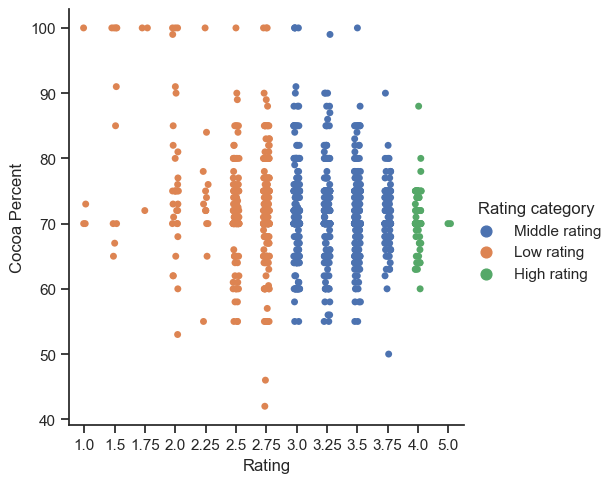

In [80]:
g = sns.catplot(x="Rating", y="Cocoa Percent", hue="Rating category", data=df_airline1)        

##### From the question generated in the previous task, there is a strong negative correlation between 'Cocoa percent and 'Rating.

##### From the exploration done so far, it is obvious that there is no correlation between any of the quantitative variables. Therefore, the high or low rating for each of the chocolate does not depend on the quanty of cocoa in them.

In [81]:
 ## 5. Exporting the data
df_airline1.to_csv(os.path.join(path, '02 Data','Prepared Data for storing any manipulated data sets', 'flavors_of_cacao_visuals.csv'))